# Homework 2
### Rolando Santos
### https://github.com/rsantos2032/DSCI401/
### 2023-09-07

In [1]:
# Loading the Dataset
import pandas as pd
Teams = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Teams.csv")
Violations = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Violations.csv")

### Question 1: Using the Teams data frame in the Lahman package:

#### a. Create a data frame that is a subset of the Teams data frame that contains only the years from 2000 through 2009 and the variables yearID, W, and L.

In [153]:
teams_subset = Teams.loc[(Teams.yearID >= 2000) & (Teams.yearID <= 2009), ["yearID", "W", "L"]]
teams_subset.head()

,yearID,W,L
2325,2000,82,80
2326,2000,85,77
2327,2000,95,67
2328,2000,74,88
2329,2000,85,77


In [154]:
teams_subset.shape

(300, 3)

#### b. How many years did the Chicago Cubs (teamID is “CHN”) hit at least 200 HRs in a season and what was the median number of wins in those seasons.

In [30]:
summarized_win = (Teams.loc[Teams.teamID == "CHN"]).groupby(Teams.yearID)["HR"].sum()
summarized_win = pd.DataFrame(summarized_win)
summarized_win = summarized_win.loc[summarized_win.HR >= 200]
summarized_win

,HR
yearID,
1987,209
1998,212
2002,200
2004,235
2017,223
2019,256
2021,210


In [33]:
summarized_win.HR.median()

212.0

There were 7 years where the cubs the cubs over had 200 home runs in that season. The median number of wins is 212.

#### c. Create a factor called election that divides the yearID into 4-year blocks that correspond to U.S. presidential terms. The first presidential term started in 1788. They each last 4 years and are still on the schedule set in 1788. During which term were the most home runs been hit?

In [171]:
Teams["election"] = pd.Categorical((Teams.yearID - (Teams.yearID % 4) - 1788)/4 + 1) #Pandas equivalent to factor() is Categorical
Teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,election,Winning_Record
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,21.0,True
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,21.0,True
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,21.0,False
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1,21.0,False
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2,21.0,False


In [183]:
Teams.groupby(Teams.election)["HR"].sum().sort_values(ascending = False)[0:1]

election
58.0    24076
Name: HR, dtype: int64

The most home runs by term was achieved in the 58 presidential election term (2016).

#### d. Make a line plot of total home runs per season and stratify by league. Remove observations where league is missing.

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [55]:
league_teams = Teams.loc[Teams.lgID.notna()]
league_teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,election
50,1876,NL,BSN,ATL,NaN,4,70,NaN,39,31,...,0.860,Boston Red Caps,South End Grounds I,NaN,102,98,BSN,BSN,BSN,1876
51,1876,NL,CHN,CHC,NaN,1,66,NaN,52,14,...,0.899,Chicago White Stockings,23rd Street Grounds,NaN,112,106,CHC,CHN,CHN,1876
52,1876,NL,CN1,CNR,NaN,8,65,NaN,9,56,...,0.841,Cincinnati Reds,Avenue Grounds,NaN,86,95,CIN,CN1,CN1,1876
53,1876,NL,HAR,HAR,NaN,2,69,NaN,47,21,...,0.888,Hartford Dark Blues,Hartford Ball Club Grounds,NaN,110,106,HAR,HAR,HAR,1876
54,1876,NL,LS1,LGR,NaN,5,69,NaN,30,36,...,0.875,Louisville Grays,Louisville Baseball Park,NaN,117,117,LOU,LS1,LS1,1876


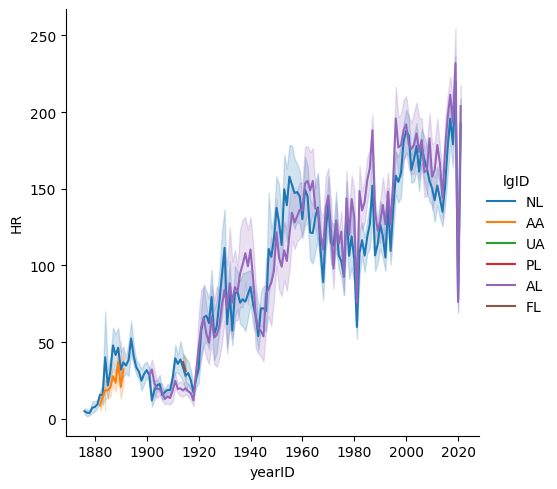

In [64]:
sns.relplot(data = league_teams, x = "yearID", y = "HR", hue = "lgID" , kind = "line")

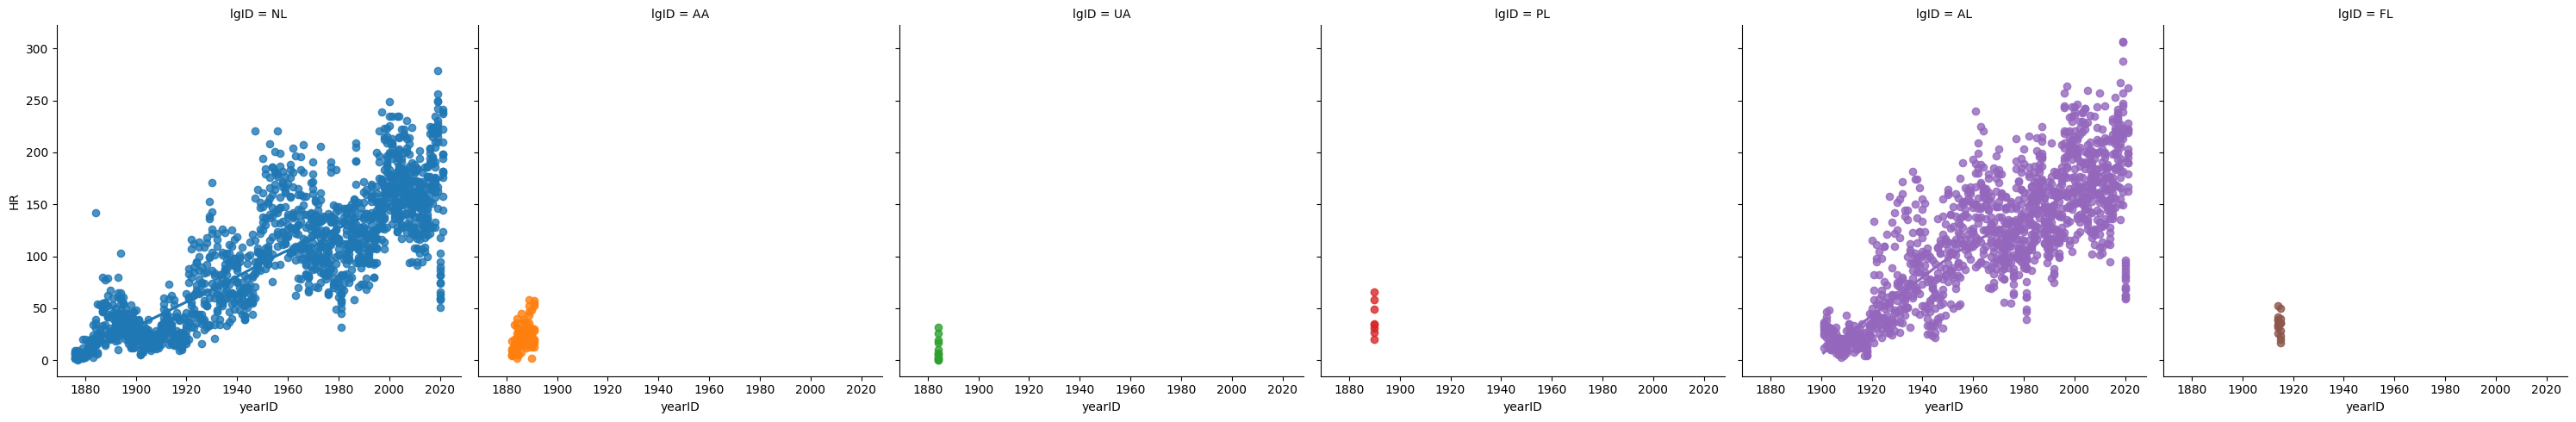

In [69]:
sns.lmplot(x = "yearID", y = "HR", hue = "lgID", col = "lgID", data = league_teams, lowess = True)

#### e. Create an indicator variable called “winning record” which is defined as TRUE if the number of wins is greater than the number of losses and FALSE otherwise. Plot a scatter plot of Runs (R) vs Runs against (RA) with the color of each point showing whether that team had a winning record or not.

In [71]:
Teams["Winning_Record"] = Teams.W > Teams.L
Teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,election,Winning_Record
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,1868,True
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,1868,True
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,1868,False
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1,1868,False
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2,1868,False


<Axes: xlabel='R', ylabel='RA'>

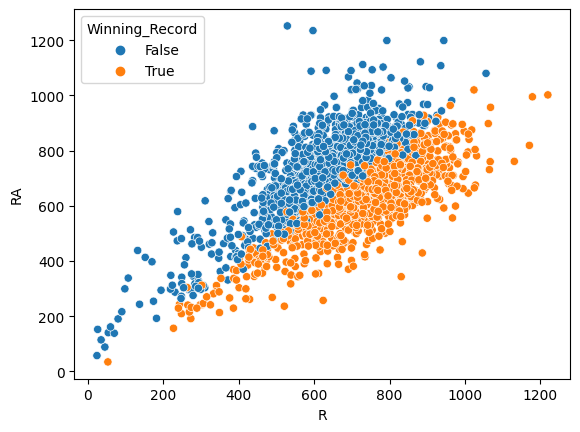

In [72]:
sns.scatterplot(x = "R", y = "RA", hue = "Winning_Record", data = Teams)

### Question 2: The Violations data set in the mdsr package contains information regarding the outcome of health inspections of restaurants in New York City.

#### a. What proportion of inspections in each boro were given a grade of A? (Missing values should be counted as not an A grade.)

In [157]:
Violations["a_grade"] = Violations.grade == "A"
Violations["a_grade"] = Violations["a_grade"].astype(int)
Violations.groupby(Violations.boro)["a_grade"].agg("mean")

boro
BRONX            0.351805
BROOKLYN         0.329875
MANHATTAN        0.342472
Missing          0.452055
QUEENS           0.328954
STATEN ISLAND    0.362419
Name: a_grade, dtype: float64

#### b.  Find the top ten dba’s with the most number of inspections. Then compute the average score for each of these dba’s andsort by mean score. Which of these top 10 had the lowest average inspection score?

In [121]:
most_violations = Violations.groupby(Violations.dba)["dba"].agg(['count']).reset_index()
most_violations = most_violations.sort_values("count", ascending = False)[0:10]
most_violations

,dba,count
16967,SUBWAY,5005
5303,DUNKIN' DONUTS,4967
11612,MCDONALD'S,4078
16842,STARBUCKS,2442
5304,"DUNKIN' DONUTS, BASKIN ROBBINS",1951
4482,CROWN FRIED CHICKEN,1724
5106,DOMINO'S,1492
2749,BURGER KING,1466
9406,KENNEDY FRIED CHICKEN,1435
7214,GOLDEN KRUST CARIBBEAN BAKERY & GRILL,1134


In [131]:
Violations.loc[Violations.dba.isin(most_violations.dba)].groupby(Violations.dba)["score"].mean().sort_values()

dba
STARBUCKS                                11.664354
DUNKIN' DONUTS                           13.597921
DUNKIN' DONUTS, BASKIN ROBBINS           14.450216
SUBWAY                                   14.806099
MCDONALD'S                               16.977680
BURGER KING                              17.337428
KENNEDY FRIED CHICKEN                    18.042160
GOLDEN KRUST CARIBBEAN BAKERY & GRILL    18.276753
CROWN FRIED CHICKEN                      18.562773
DOMINO'S                                 18.635636
Name: score, dtype: float64

From the results it appears that STARBUCKS had the lowest mean average with a mean score of 11.66435.

#### c. Use these data to calculate the median violation score by zip code for zip codes in Manhattan with 50 or more inspections. What pattern do you see between the number of inspections and the median score?

In [149]:
inspections_manhattan = Violations.loc[Violations.boro == "MANHATTAN"].groupby(Violations.zipcode).agg({'zipcode':'count', 'score':'median'}).rename(columns={'zipcode':'num_inspections'})
inspections_manhattan = inspections_manhattan.loc[inspections_manhattan.num_inspections >= 50]
inspections_manhattan.head()

,num_inspections,score
zipcode,,
10001,8420,15.0
10002,9113,18.0
10003,13556,17.0
10004,2304,14.0
10005,1209,17.0


In [152]:
inspections_manhattan.shape

(51, 2)

<Axes: xlabel='num_inspections', ylabel='score'>

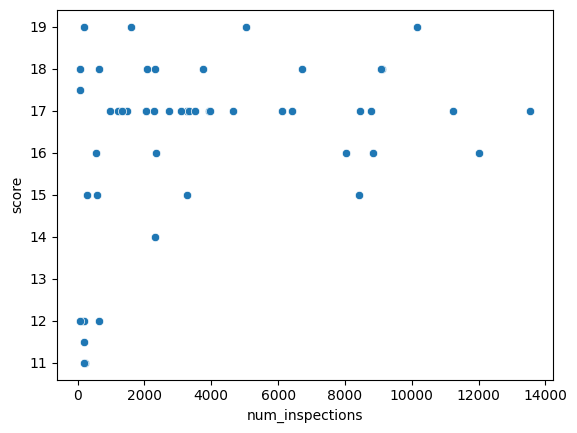

In [155]:
sns.scatterplot(x = "num_inspections", y = "score" , data = inspections_manhattan)

From the graph we can see that most zip codes with a low median score have less occurences of inspections compared to median score of ~16 and above.